<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Data_analytics/blob/main/samsung_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1: Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set notebook to display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

Section 2: Read Dataset & Handle

In [2]:
# Load the dataset
df = pd.read_csv("005930.KS.csv")

# Display basic info and head
print("Dataframe Info:")
df.info()
print("\nFirst 5 rows of dataset:")
df.head()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert Date to datetime object
df['Date'] = pd.to_datetime(df['Date'])

#Set 'Date' as index
df = df.set_index('Date')

# Sort by date
df = df.sort_index()
print("\nDataset after processing:")
df.head()

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1487 non-null   object 
 1   Open       1487 non-null   float64
 2   High       1487 non-null   float64
 3   Low        1487 non-null   float64
 4   Close      1487 non-null   float64
 5   Adj Close  1487 non-null   float64
 6   Volume     1487 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 81.4+ KB

First 5 rows of dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,39400.0,39400.0,38550.0,38750.0,33287.285156,7847664
1,2019-01-03,38300.0,38550.0,37450.0,37600.0,32299.408203,12471493
2,2019-01-04,37450.0,37600.0,36850.0,37450.0,32170.556641,14108958
3,2019-01-07,38000.0,38900.0,37800.0,38750.0,33287.285156,12748997
4,2019-01-08,38000.0,39200.0,37950.0,38100.0,32728.914062,12756554



Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Dataset after processing:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,33287.285156,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,32299.408203,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,32170.556641,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,33287.285156,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,32728.914062,12756554


Section 3: Data Visualization

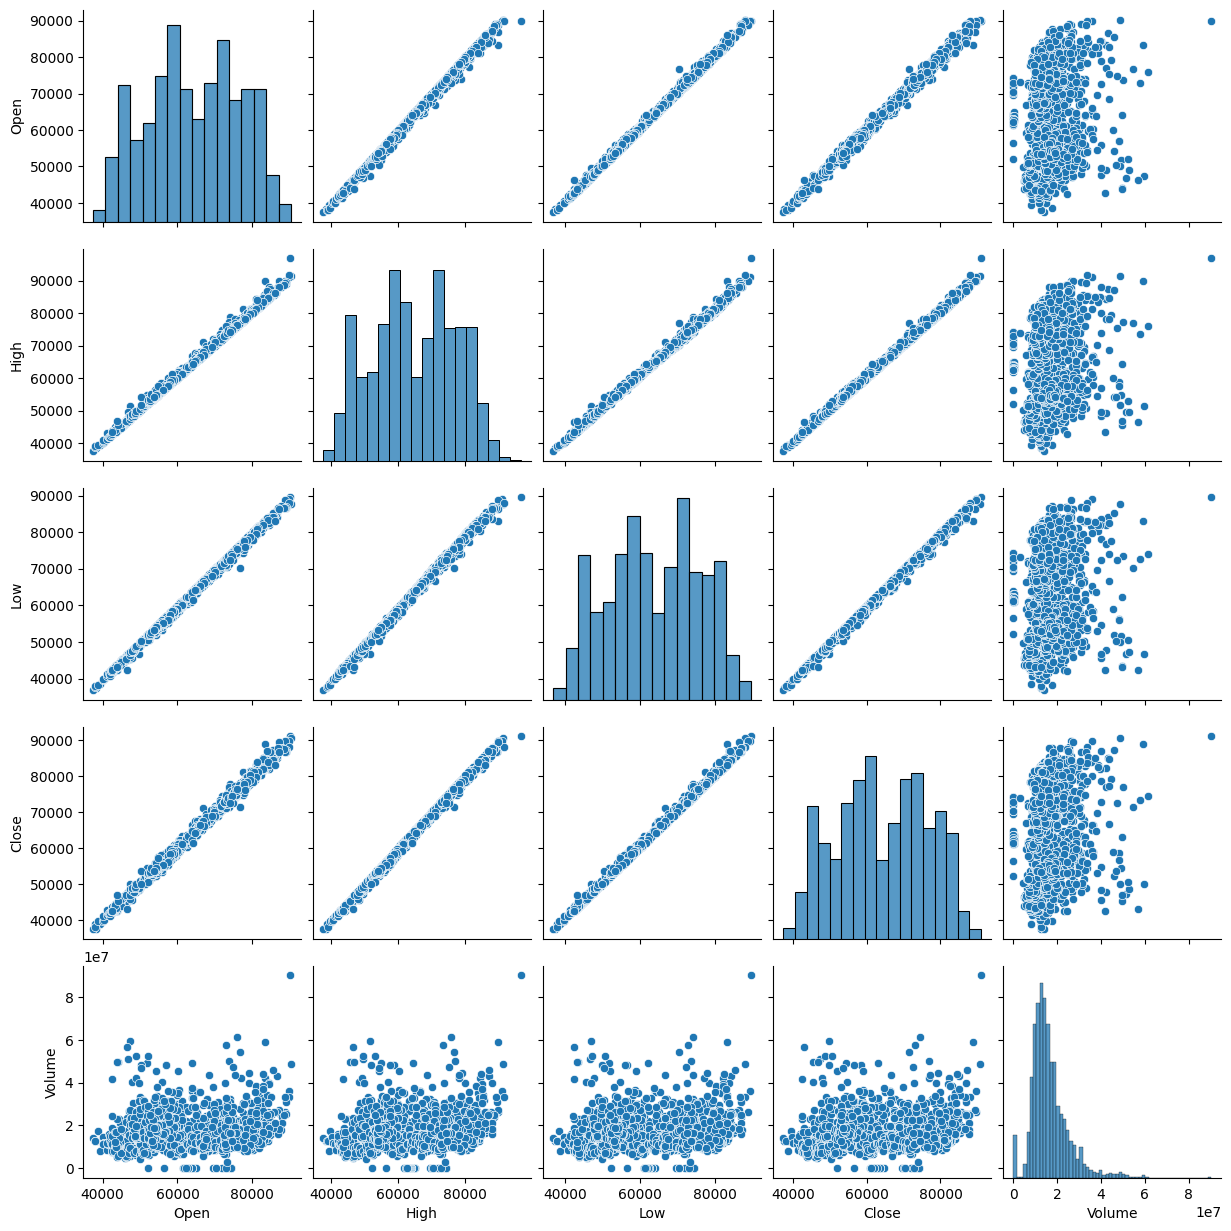

In [3]:
# Create interactive line chart with Plotly for Close Price over time
fig_close = px.line(df, y="Close", title="Harga Penutupan Saham Samsung Electronics dari Waktu ke Waktu")
fig_close.show()

# Create interactive line chart with Plotly for Volume over time
fig_volume = px.line(df, y="Volume", title="Volume Perdagangan Saham Samsung Electronics dari Waktu ke Waktu")
fig_volume.show()

# Candlestick chart for a recent period (last 3 months)
df_recent = df.last('3M') # Using pandas resample instead of function.

fig_candlestick = go.Figure(data=[go.Candlestick(
    x=df_recent.index,
    open=df_recent['Open'],
    high=df_recent['High'],
    low=df_recent['Low'],
    close=df_recent['Close']
)])
fig_candlestick.update_layout(title="Candlestick Chart Saham Samsung Electronics (3 Bulan Terakhir)")
fig_candlestick.show()

# Pairplot using seaborn (for numerical features)
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.show()

# Correlation matrix heatmap (using plotly for interactivity)
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

fig_heatmap = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis'
))
fig_heatmap.update_layout(title="Korelasi Antara Fitur Numerik")
fig_heatmap.show()

Section 4: Split Data into Train & Test

In [4]:
# Feature selection
features = ['Open', 'High', 'Low', 'Volume'] # Tidak include Adj Close karena hasil adjusment Close

# Target variable
target = 'Close'

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42, shuffle=False)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (1189, 4)
Test data shape: (298, 4)


Section 5: Build Linear Regression Model

LinearRegression()

RMSE: 411.7329650790486
R2 Score: 0.9982190530191483


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Perbandingan Harga Aktual dan Prediksi dengan Linear Regression')

Text(0.5, 0, 'Tanggal')

Text(0, 0.5, 'Harga')

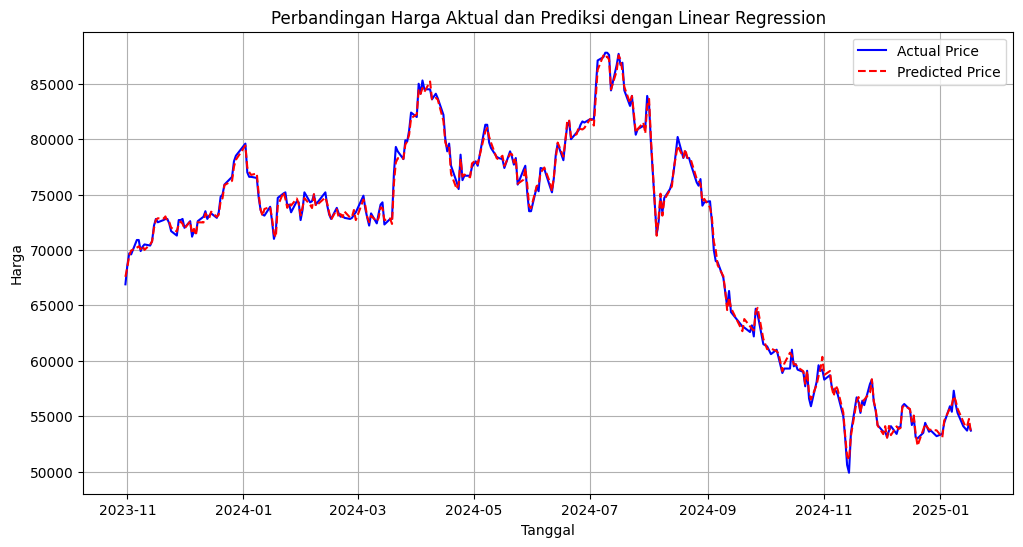

In [5]:
# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

# Plotting the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red', linestyle='--')
plt.title('Perbandingan Harga Aktual dan Prediksi dengan Linear Regression')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()